# Name: Roshan Sharma
- Data Science and Business Analytics Intern at The Sparks Foundation.
- Graduate Rotational Internship Program (Batch - November 2021).

---

**Problem Statement:**
Predict the percentage of a student based on the number of study hours.

---

**Information about data set:**

- The data was provided by a link: *http://bit.ly/w-data*
- It consisted of observations on 25 student about the numbers of hours each studied and their respective test scores.

## Importing Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from scipy.stats import shapiro
from sklearn import metrics
%matplotlib inline

## Importing Dataset & Checking for null values
The Data was provided by as remote link.

In [3]:
link = "http://bit.ly/w-data"
df = pd.read_csv(link)

df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [5]:
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

*Since the data provided disn't had any null values, we continue with our analysis.*

## Checking Normality using Shapiro-Wilk Test

In [18]:
shapiro(df['Hours'])

ShapiroResult(statistic=0.9401376247406006, pvalue=0.1491180658340454)

In [19]:
shapiro(df['Scores'])

ShapiroResult(statistic=0.9168438911437988, pvalue=0.04343847185373306)

*Since p-value > 0.05, we can assume that our data is normally distributed*

## Checking Correlation between both variables

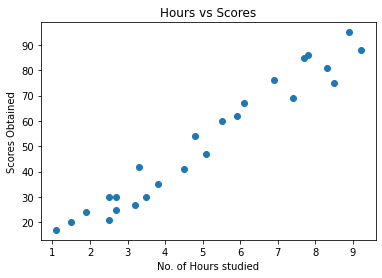

In [7]:
plt.scatter(df.Hours, df.Scores)
plt.title("Hours vs Scores")
plt.xlabel("No. of Hours studied")
plt.ylabel("Scores Obtained")
plt.show()

*We can observe that there is a positive linear correlation between Hours and Scores. Hence, we move ahead.*

## Preparing the Data

In [8]:
x = df.iloc[ : , :-1].values
y = df.iloc[ : , 1].values

In [9]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

## Training the algorithm

In [10]:
reg = LinearRegression()
reg.fit(x_train, y_train)

LinearRegression()

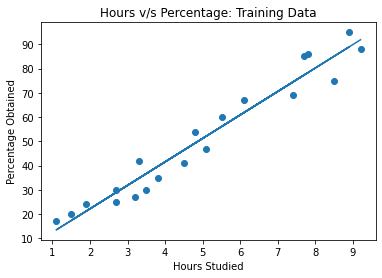

0.9491209376364416

In [20]:
plt.scatter(x_train, y_train)
plt.plot(x_train, reg.predict(x_train))
plt.title('Hours v/s Percentage: Training Data')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Obtained')
plt.show()

reg.score(x_train, y_train)

## Predicting for test data

In [12]:
y_pred = reg.predict(x_test)
print(y_pred)

[83.18814104 27.03208774 27.03208774 69.63323162 59.95115347]


In [13]:
comp = pd.DataFrame({'Actual values': y_test, 'Predicted values': y_pred})
comp

,Actual values,Predicted values
0,81,83.188141
1,30,27.032088
2,21,27.032088
3,76,69.633232
4,62,59.951153


In [14]:
reg.score(x_test, y_test)

0.9678055545167994

## Checking Assumptions

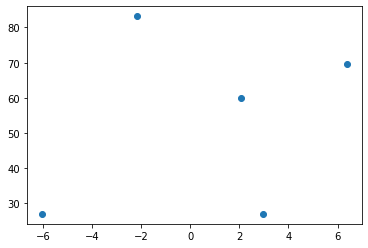

In [28]:
residuals = y_test - y_pred
plt.scatter(residuals, y_pred)

## Predicting for self given values

In [15]:
hours = float(input("Enter study hours:"))
hours = [[hours]]
self_pred = reg.predict(hours)
print("Predicted Score = {}".format(self_pred[0]))

Enter study hours:9.25
Predicted Score = 92.38611528261494


## Model Evaluation

**For evaluating our model we are going to use Root Mean Squared Error (RMSE) & Mean Absolute Percentage Error (MAPE)**

In [16]:
print("Root Mean Squared Error: ", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Root Mean Squared Error:  4.352380006653288


In [26]:
print("Mean Absolute Percentage Error: ", metrics.mean_absolute_percentage_error(y_test, y_pred))

Mean Absolute Percentage Error:  0.10600118977553538
